In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Math
import sympy as sym
from sympy.abc import x,y,z,q
sym.init_printing()

# LIMITS

In [17]:
fx = x**3
limit_point = 1.5
lim = sym.limit(e=fx,z=x,z0=limit_point)
Math(f'\\lim_{{x\\to{limit_point}}} {{{sym.latex(fx)}}} = {{{lim:.3f}}}')

<IPython.core.display.Math object>

In [18]:
fxx = sym.lambdify(x,fx) # THIS CREATES A FUNCTION WHERE WE CAN ENTER VALUES INTO IT
fxx(1.5) # SEE HOW THE LIMIT POINT MATCHES THE SYM.LIMIT() AT 1.5

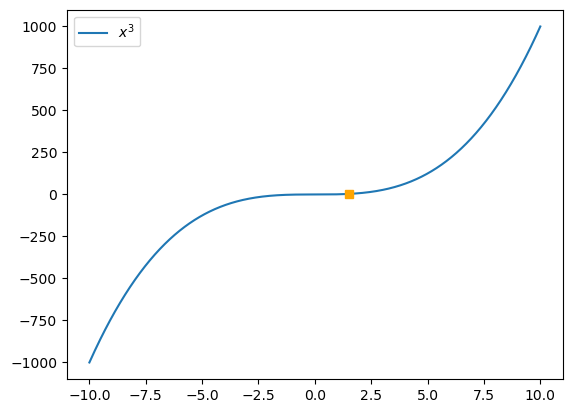

In [25]:
xx = np.linspace(-10,10,1000) # CREATING A LINEARY SPACED VECTOR OF NUMBERS

plt.plot(xx,fxx(xx),label=f'${{{sym.latex(fx)}}}$') # PLOTTING THE VECTOR VERSUS THE FXX FUNCTION
plt.plot(limit_point,fxx(limit_point),c='orange',marker='s')
plt.legend()
plt.show()

### Limit that causes division by zero. Limit direction from left and right

<IPython.core.display.Math object>

<IPython.core.display.Math object>

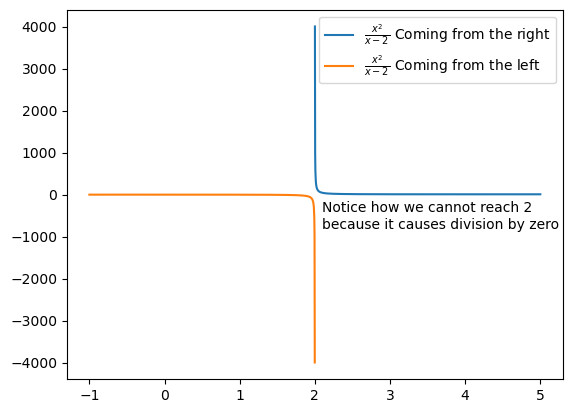

In [54]:
fx = x**2/(x-2)
limit_point = 2 # DIVISION BY ZERO.
lim = sym.limit(e=fx,z=x,z0=limit_point,dir='+')
display(Math(f'\\lim_{{x^+\\to{limit_point}}} {{{sym.latex(fx)}}} = {{{lim}}}'))

lim = sym.limit(e=fx,z=x,z0=limit_point,dir='-')
display(Math(f'\\lim_{{x^-\\to{limit_point}}} {{{sym.latex(fx)}}} = {{{lim}}}'))

fxx = sym.lambdify(x,fx)
xx = np.linspace(2.001,5,1000)
plt.plot(xx,fxx(xx),label=f'${{{sym.latex(fx)}}}$ Coming from the right') 

xx = np.linspace(1.999,-1,1000)
plt.plot(xx,fxx(xx),label=f'${{{sym.latex(fx)}}}$ Coming from the left')
plt.text(x=2.1,y=-800,s='Notice how we cannot reach 2 \nbecause it causes division by zero')
plt.legend()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

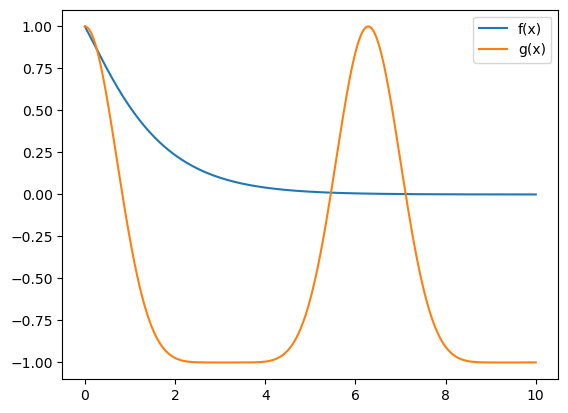

In [85]:
fx = sym.exp(-x)*sym.sqrt(x+1)
fxx = sym.lambdify(x,fx)
limit_point = 5
lim1 = sym.limit(e=fx,z=x,z0=limit_point)
display(Math(f'f(x) = \\lim_{{x\\to{limit_point}}} {{{sym.latex(fx)}}} = {{{lim1}}}'))

gx = sym.cos(x+sym.sin(x))
gxx = sym.lambdify(x,gx)
limit_point = 5
lim2 = sym.limit(e=gx,z=x,z0=limit_point)
display(Math(f'g(x) = \\lim_{{x\\to{limit_point}}} {{{sym.latex(gx)}}} = {{{lim2}}}'))

display(Math(f'\\frac{{\\lim_{{x\\to{limit_point}}} {{{sym.latex(fx)}}}}} {{\\lim_{{x\\to{limit_point}}} {{{sym.latex(gx)}}}}} = \\lim_{{x\\to{limit_point}}} \\frac{{f(x)}}{{g(x)}}'))

fgx = fxx(5)/gxx(5)

display(Math(f'\\lim_{{x\\to{limit_point}}} \\frac{{f(x)}}{{g(x)}} = {{{fgx:.4f}}}'))

xx = np.linspace(0,10,1000)
plt.plot(xx,fxx(xx),label='f(x)')
plt.plot(xx,gxx(xx),label='g(x)')
plt.legend()
plt.show()

# PIECEWISE FUNCTIONS
* Functions that have more than one expression

<IPython.core.display.Math object>

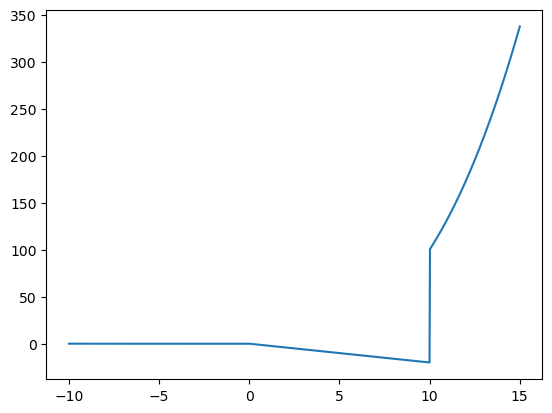

In [104]:
from sympy.abc import x
pw1 = 0
pw2 = -2*x
pw3 = 0.1*x**3
fx = sym.Piecewise( (pw1,x<=0),(pw2,(x>0) & (x<10)),(pw3,x>=10) )

display(Math(f'f(x) = {{{sym.latex(fx)}}}'))

fxx = sym.lambdify(x,fx)
xx = np.linspace(-10,15,1000)

fig,ax = plt.subplots()
ax.plot(xx,fxx(xx))
plt.show()

# DERIVATIVE WITH NUMPY

In [435]:
##### NUMPY #####
xx = np.linspace(-5,5,10001)
fx = xx**2
dfx = np.diff(fx)/(xx[1]-xx[0]) # xx[1]-xx[0] IS THE DIFFERENTIAL OF xx
print('Numpy ', np.round(dfx,2))

##### SYMPY #####
fx1 = x**2
dfx1 = sym.diff(fx1)

dfxx = sym.lambdify(x,dfx1)

print('Sympy ',np.round(dfxx(xx),2))

Numpy  [-10.   -10.   -10.   ...   9.99  10.    10.  ]
Sympy  [-10. -10. -10. ...  10.  10.  10.]


# DERIVATIVES OF POLYNOMIALS
* Derivative is the rate of change of a function with respect to a variable.
* $d$ = differential
* Leibniz Notation: $\frac{df}{dx}$ == The derivative of $f(x)$ with respect to ($wrt$) $x$

### Power Rule
* Power Rule: $\frac{d}{dx}ax^n\pm C = nax^{n-1}$ The constant C gets dropped

In [158]:
def plot_fx_dx(xx,fxx,dfxx,title):
    fig,ax = plt.subplots()
    ax.axhline(0,c='k',ls=':')
    ax.axvline(0,c='k',ls=':')
    ax.plot(xx,fxx(xx),label='$f(x)$')
    ax.plot(xx,dfxx(xx), label='$\\frac{df}{dx}$')
    ax.set_title(title)
    ax.legend()
    plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

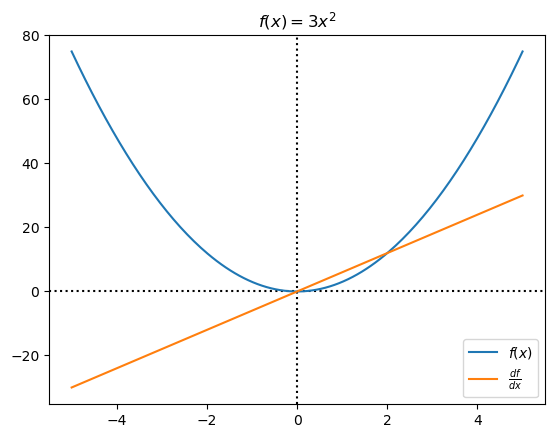

In [160]:
from sympy.abc import x

fx = 3*x**2
dfx = sym.diff(fx)
display(Math(f'f(x) = {{{sym.latex(fx)}}}'))
display(Math('\\frac{df}{dx}3x^2 = 2*3x = 6x'))
display(Math(f"\\text{{sym.diff(fx) results: }} {{{sym.latex(dfx)}}}"))

xx = np.linspace(-5,5,200)
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)

plot_fx_dx(xx=xx,fxx=fxx,dfxx=dfxx,title='$f(x) = 3x^2$')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

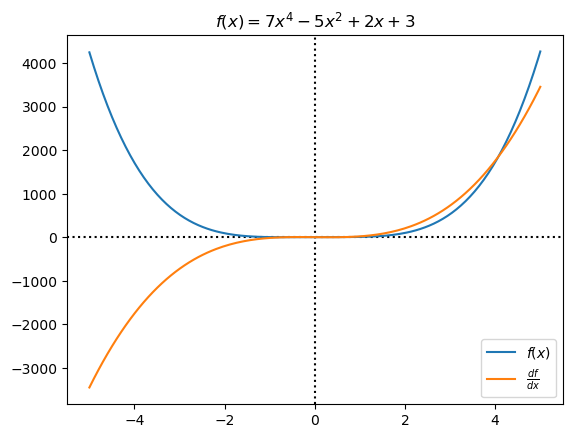

In [161]:
fx = 3+2*x -5*x**2 + 7*x**4
dfx = sym.diff(fx)

display(Math(f'f(x) = {{{sym.latex(fx)}}}'))
display(Math(f'\\frac{{df}}{{dx}} = {{{sym.latex(dfx)}}}'))

xx = np.linspace(-5,5,200)
fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)

plot_fx_dx(xx=xx, fxx=fxx, dfxx=dfxx, title=f'$f(x) = {{{sym.latex(fx)}}}$')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

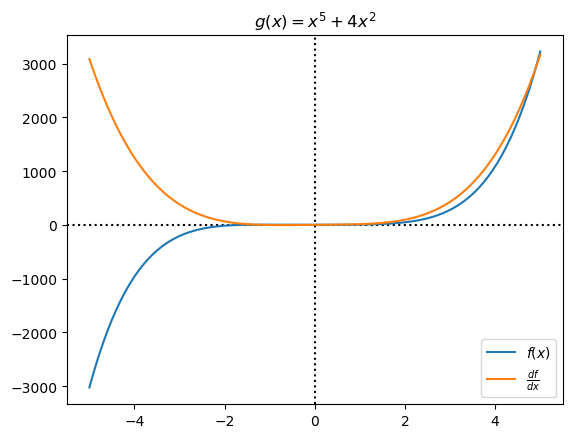

In [170]:
gx = 4*x**2 + x**5
dgx = sym.diff(gx)

display(Math(f'g(x) = {{{sym.latex(gx)}}}'))
display(Math(f'\\frac{{dg}}{{dx}} = {{{sym.latex(dgx)}}}'))

xx = np.linspace(-5,5,200)
gxx = sym.lambdify(x,gx)
dgxx = sym.lambdify(x,dgx)

plot_fx_dx(xx=xx, fxx=gxx, dfxx=dgxx, title=f'$g(x) = {{{sym.latex(gx)}}}$')

### Summation Rule
* $ h(x) = f(x) + g(x) $
* $\frac{dh}{dx} = \frac{df}{dx} + \frac{dg}{dx}$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------Addition Rule-------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------


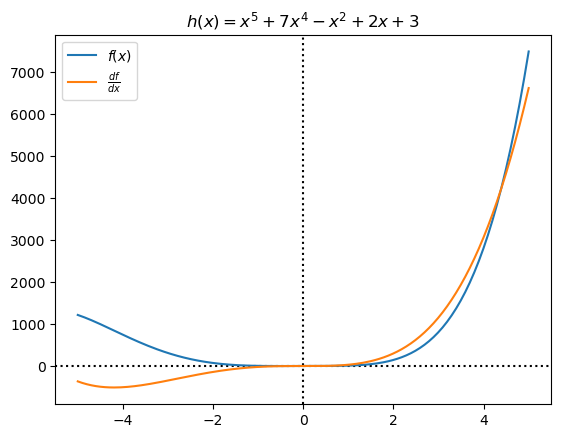

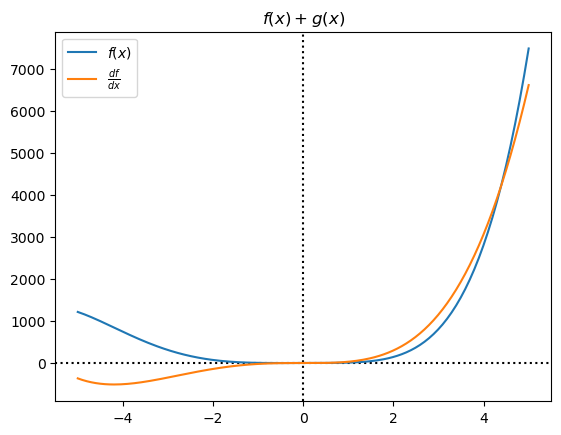

In [189]:
#### F(X) & DFX ####
fx = 3+2*x -5*x**2 + 7*x**4
dfx = sym.diff(fx)

display(Math(f'f(x) = {{{sym.latex(fx)}}}'))
display(Math(f'\\frac{{df}}{{dx}} = {{{sym.latex(dfx)}}}'))
print('----------------------')

#### G(X) & DGX ####
gx = 4*x**2 + x**5
dgx = sym.diff(gx)

display(Math(f'g(x) = {{{sym.latex(gx)}}}'))
display(Math(f'\\frac{{dg}}{{dx}} = {{{sym.latex(dgx)}}}'))
print('---------Addition Rule-------------')

#### H(X) & DHX ####
hx = fx + gx # ADDING THE FUNCTIONS
dhx = sym.diff(hx)

display(Math('h(x) = f(x) + g(x)'))
display(Math(f'h(x) = {{{sym.latex(hx)}}}'))
display(Math(f'\\frac{{dh}}{{dx}} = {{{sym.latex(dhx)}}}'))
display(Math(f'\\frac{{dh}}{{dx}} = \\frac{{df}}{{dx}}  + \\frac{{dg}}{{dx}} = {{{sym.latex(sym.expand(dfx+dgx))}}}'))
print('----------------------')

xx = np.linspace(-5,5,200)

hxx = sym.lambdify(x,hx)
dhxx = sym.lambdify(x,dhx)

fgxx = sym.lambdify(x,fx+gx) # ADDING THE FUNCTIONS
dfgxx = sym.lambdify(x,dfx+dgx) # ADDING THE DERIVATIVES

plot_fx_dx(xx=xx, fxx=hxx, dfxx=dhxx, title=f'$h(x) = {{{sym.latex(hx)}}}$')
plot_fx_dx(xx=xx, fxx=fgxx, dfxx=dfgxx, title=f'$f(x) + g(x)$')

### Product Rule
* $h(x) = f(x) * g(x)$
* $\frac{dh}{dx} = \frac{df}{dx} * g(x) + f(x) * \frac{dg}{dx}$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------Product Rule-------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------


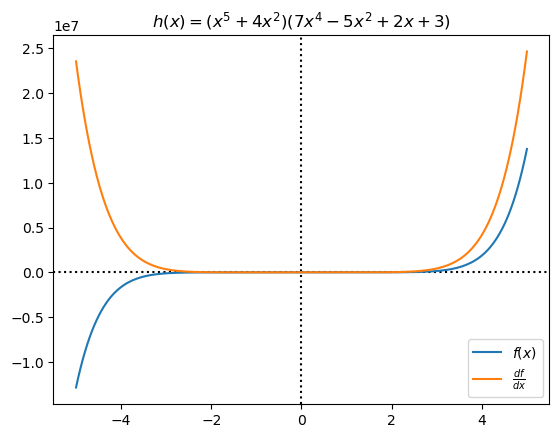

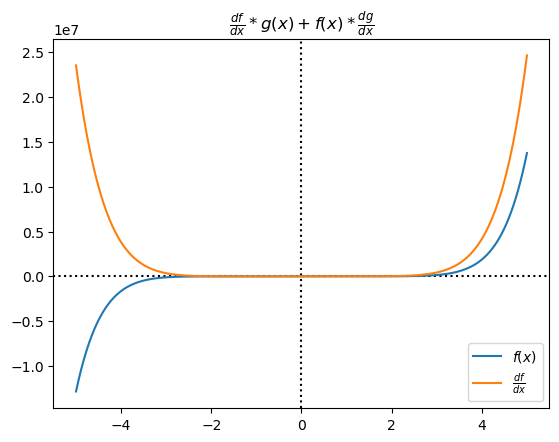

In [191]:
#### F(X) & DFX ####
fx = 3+2*x -5*x**2 + 7*x**4
dfx = sym.diff(fx)

display(Math(f'f(x) = {{{sym.latex(fx)}}}'))
display(Math(f'\\frac{{df}}{{dx}} = {{{sym.latex(dfx)}}}'))
print('----------------------')

#### G(X) & DGX ####
gx = 4*x**2 + x**5
dgx = sym.diff(gx)

display(Math(f'g(x) = {{{sym.latex(gx)}}}'))
display(Math(f'\\frac{{dg}}{{dx}} = {{{sym.latex(dgx)}}}'))
print('---------Product Rule-------------')

#### H(X) & DHX ####
hx = fx * gx # MULTIPLYING THE FUNCTIONS
dhx = sym.diff(hx)

display(Math('h(x) = f(x) * g(x)'))
display(Math(f'h(x) = {{{sym.latex(sym.expand(hx))}}}'))
display(Math(f'\\frac{{dh}}{{dx}} = {{{sym.latex(sym.expand(dhx))}}}'))

display(Math(f'\\frac{{dh}}{{dx}} = \\frac{{df}}{{dx}}*g(x) + f(x)*\\frac{{dg}}{{dx}}  = {{{sym.latex(sym.expand(dfx*gx + fx * dgx))}}}'))
print('----------------------')

xx = np.linspace(-5,5,200)

hxx = sym.lambdify(x,hx)
dhxx = sym.lambdify(x,dhx)

fgxx = sym.lambdify(x,fx*gx) # MULTIPLYING THE FUNCTIONS
dfgxx = sym.lambdify(x,dfx*gx + fx*dgx) # DF(X) * G(X) + F(X) *  DG(X)

plot_fx_dx(xx=xx, fxx=hxx, dfxx=dhxx, title=f'$h(x) = {{{sym.latex(hx)}}}$')
plot_fx_dx(xx=xx, fxx=fgxx, dfxx=dfgxx, title=f'$\\frac{{df}}{{dx}}*g(x) + f(x)*\\frac{{dg}}{{dx}}$')

# Circular Derivatives
* $\frac{d}{dx} \cos(x) = -\sin(x)$
* $\frac{d}{dx} -sin(x) = -\cos(x)$
* $\frac{d}{dx} -\cos(x) = \sin(x)$
* $\frac{d}{dx} sin(x) = \cos(x)$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

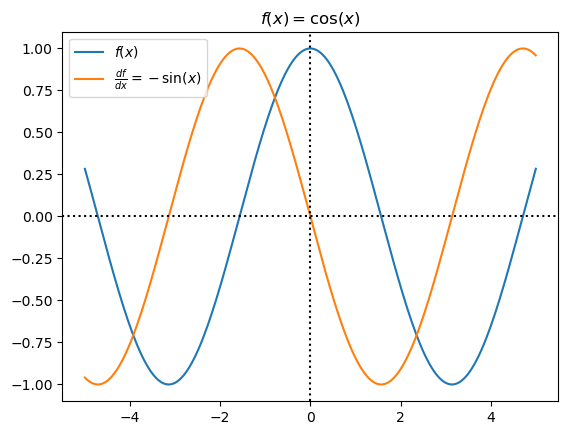

In [204]:
from sympy.abc import x

display(Math(f'{{{sym.latex(sym.diff(sym.cos(x)))}}}'))
display(Math(f'{{{sym.latex(sym.diff(-sym.sin(x)))}}}'))
display(Math(f'{{{sym.latex(sym.diff(-sym.cos(x)))}}}'))
display(Math(f'{{{sym.latex(sym.diff(sym.sin(x)))}}}'))

fx = sym.cos(x)
fxx = sym.lambdify(x,fx)
xx = np.linspace(-5,5,200)

dfx = sym.diff(fx)
dfxx = sym.lambdify(x,dfx)

fig,ax = plt.subplots()
ax.plot(xx,fxx(xx), label='$f(x)$')
ax.plot(xx,dfxx(xx), label='$\\frac{df}{dx} = -\\sin(x)$')
plt.axhline(0,c='k',ls=':')
plt.axvline(0,c='k',ls=':')
ax.set_title('$f(x) = \\cos(x)$')
ax.legend()
plt.show()

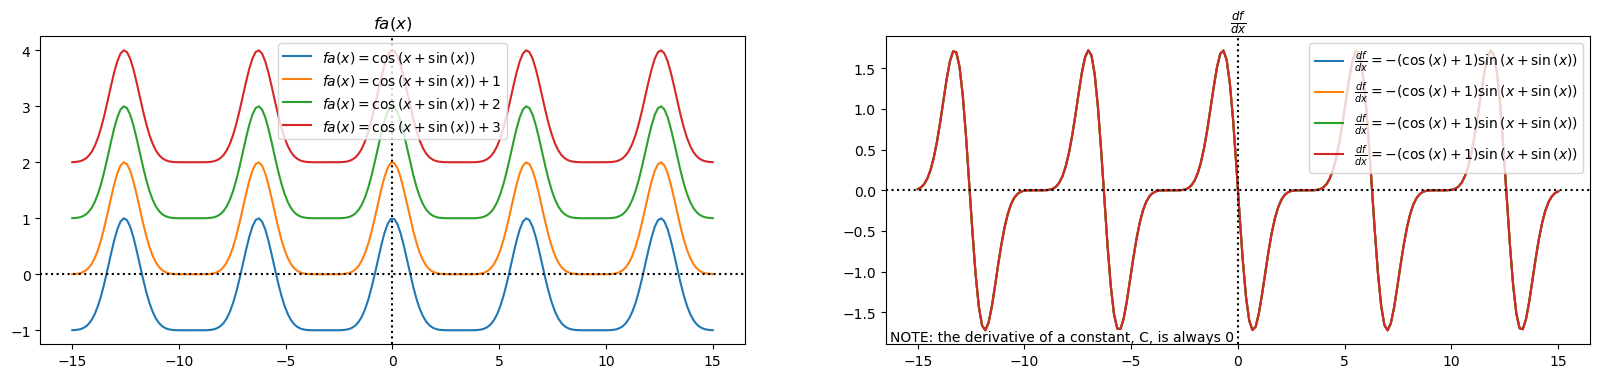

In [229]:
C = [0,1,2,3] # CONSTANT
xx = np.linspace(-15,15,200)

fig,ax = plt.subplots(1,2, figsize=(20,4))
for c in C:
    fax = sym.cos(x+sym.sin(x)) + c
    dfax = sym.diff(fax)
    faxx = sym.lambdify(x,fax)
    dfaxx = sym.lambdify(x,dfax)
    ax[0].plot(xx,faxx(xx),label=f'$fa(x) = {{{sym.latex(fax)}}}$')
    ax[1].plot(xx,dfaxx(xx),label=f'$\\frac{{df}}{{dx}} = {{{sym.latex(dfax)}}}$')

ax[0].axhline(0,c='k',ls=':')
ax[0].axvline(0,c='k',ls=':')
ax[1].axhline(0,c='k',ls=':')
ax[1].axvline(0,c='k',ls=':')
ax[0].set_title('$fa(x)$')
ax[1].set_title('$\\frac{df}{dx}$')
ax[1].text(-16.3,-1.85,s='NOTE: the derivative of a constant, C, is always 0')
ax[0].legend()
ax[1].legend()
plt.show()
    

# Tangent Line at point a
* $x_{a}$ = the $x$ value you want to evaluate
* slope, $m$ $= \frac{df_{a}}{dx}$ = the derivative of $x$ w.r.t. $f(x)$ at value $x_{a}$ or $f(x_{a})$
* $x$ = the range of x values
* $tangent line = m * (x - x_{a}) + f(x_{a})$
* The tangent line is a line that depicts the slope of a point, $x_{a}$ given the $f(x)$ at point $x_{a}$  This is only for illustration purposes so we can see what the slope at point $x_{a}$ would look like in isolation.  

In [348]:
def tangentline_fx(xx,fxx,dfxx,xa,fx,dfx,figsize=(5,5)):
    '''
    xx - np.linspace(). A range of numbers for the function input.
    fxx - sym.lambdify(x,fx).  The code function, fxx, for they symbolic function fx.
    dfxx - sym.lambdify(x,dfxx).  The code function, dfxx, for they symbolic function dfx.
    xa - the point x point to evaluate on the f(x) to find its slope. 
         xa will shift the slope on the x-axis to ensure the slope touches the xa point in the x-axis.
         If the point is not shifted, then it would pass through zero on the a-xais.
    fx - the symbolic function used for the graphs title
    dfx - the symbolic derivative for the f(x) function for the graphs title
    '''
    tanline = dfxx(xa) * (xx-xa) + fxx(xa)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(xx,fxx(xx),label='$f(x)$')
    ax.plot(xx,tanline,label=f'tan line, slope = {dfxx(xa)}')
    ax.plot(xa,fxx(xa),'r+',markersize=20,label=f'$x_{{a}} = {{{xa}}}, f(x_{{a}})={{{fxx(xa)}}}$')
    ax.axhline(0,c='k',ls=':')
    ax.axvline(0,c='k',ls=':')
    ax.set_ylabel('$f(x)$')
    ax.set_xlabel('$x$')
    ax.set_title(f'$f(x) = {{{sym.latex(fx)}}}, \\frac{{d}}{{dx}} = {{{sym.latex(dfx)}}}$')
    ax.axis([xx.min()-2,2+xx.max(),fxx(xx).min()-2,2+fxx(xx).max()])
    ax.legend(loc='center',bbox_to_anchor=(1.5,.5))
    plt.show()

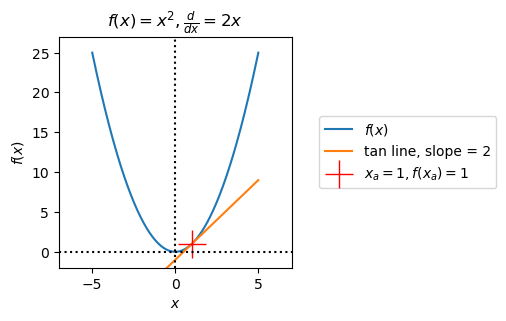

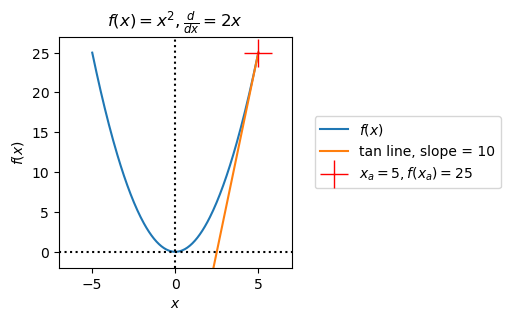

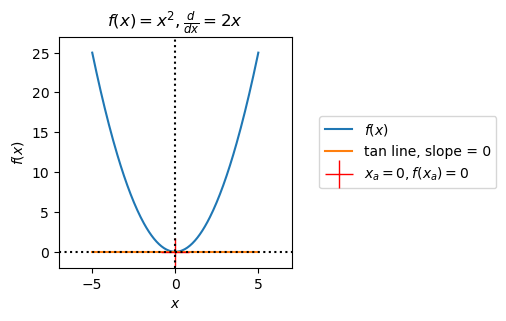

In [349]:
from sympy.abc import x

a = 1

fx = x**2
dfx = sym.diff(fx)

fxx = sym.lambdify(x,fx)
dfxx = sym.lambdify(x,dfx)

xx = np.linspace(-5,5,200)


tangentline_fx(xx=xx,fxx=fxx,dfxx=dfxx,xa=1,fx=fx,dfx=dfx,figsize=(3,3))
tangentline_fx(xx=xx,fxx=fxx,dfxx=dfxx,xa=5,fx=fx,dfx=dfx,figsize=(3,3))
tangentline_fx(xx=xx,fxx=fxx,dfxx=dfxx,xa=0,fx=fx,dfx=dfx,figsize=(3,3))

# Critical Points of a Function
* the derivative of a function that crosses zero
* or when the derivative is undefined $\infty$ -$\infty$

In [459]:
# SCIPY SIGNALS METHOD TO FIND THE CRITICAL POINTS

def plot_critical_points(xx,fxx,dfxx,title):
    
    local_max = find_peaks(fxx(xx))[0] # THE INDICIES OF THE MAX PEAKS
    local_min = find_peaks(-fxx(xx))[0] # NOTE THE NETATIVE SIGN IN FRONT OF THE fxx().  
    # THE INDICIES OF THE MAX PEAKS WHICH IS THE FUNCTION INVERTED DUE TO THE NEGATIVE SIGN WHICH TURNS OUT TO BE THE MINIMA
    
    fig,ax = plt.subplots()
    ax.axhline(0,c='k',ls=':')
    ax.axvline(0,c='k',ls=':')
    ax.plot(xx,fxx(xx),label='$f(x)$')
    ax.plot(xx,dfxx(xx),ls='--', label='$\\frac{df}{dx}$')
    for maxima in local_max:
        x = xx[maxima]
        y = fxx(xx[maxima])
        ax.scatter(x,y,marker='o',label=f'({x:.2f},{y:.2f})')
    for minima in local_min:
        x = xx[minima]
        y = fxx(xx[minima])
        ax.scatter(x,y,marker='o',label=f'({x:.2f},{y:.2f})')
    
    ax.set_title('Critical Points: '+title)
    ax.legend()
    plt.show()

In [460]:
# SYMPY METHOD TO FIND THE CRITICAL POINTS.  PERFER THIS METHOD

def plot_critical_points2(xx,fx,title):
    
    dfx = sym.diff(fx)
    critical_points = sym.solve(f=dfx) # SOLVES FOR SETTING THE DERIVATIVE = 0 AND RETURNS THE X VALUES THAT PRODUCE A 0 DERIVATIVE
    
    fxx = sym.lambdify(x,fx)
    dfxx = sym.lambdify(x,dfx)
    
    fig,ax = plt.subplots()
    ax.axhline(0,c='k',ls=':')
    ax.axvline(0,c='k',ls=':')
    ax.plot(xx,fxx(xx),label='$f(x)$')
    ax.plot(xx,dfxx(xx),ls='--', label='$\\frac{df}{dx}$')
    
    for cp in critical_points:
        cp = np.float64(cp) # CONVERT SYMPY SYMBOLIC TO A NUMBER DTYPE
        ax.scatter(cp,fxx(cp),marker='o',label=f'({cp:.2f},{fxx(cp):.2f})')
        
    ax.set_title('Critical Points: '+title)
    ax.legend()
    plt.show()

local max: [-1.  1.]
local min: [0.]
Sympy Solve(dfx)  [-1, 0, 1]


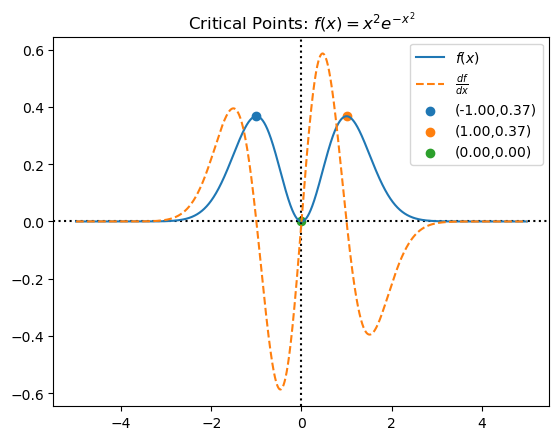

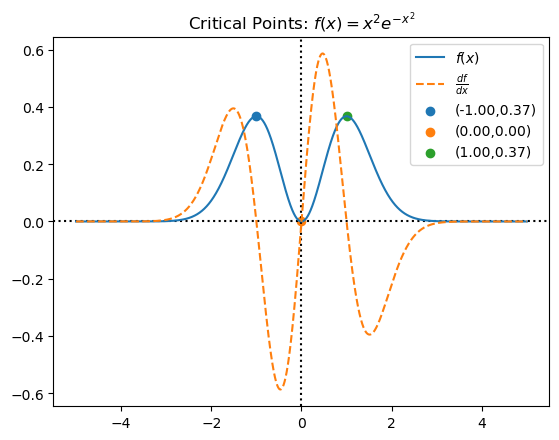

In [461]:
from sympy.abc import x
from scipy.signal import find_peaks

fx = x**2 * sym.exp(-x**2)
fxx = sym.lambdify(x,fx)
dfx = sym.diff(fx)
dfxx = sym.lambdify(x,dfx)

xx = np.linspace(-5,5,10001)

local_max = find_peaks(fxx(xx))[0] # THE INDICIES OF THE MAX PEAKS
local_min = find_peaks(-fxx(xx))[0] # NOTE THE NETATIVE SIGN IN FRONT OF THE fxx().  
# THE INDICIES OF THE MAX PEAKS WHICH IS THE FUNCTION INVERTED DUE TO THE NEGATIVE SIGN WHICH TURNS OUT TO BE THE MINIMA

print(f'local max: {xx[local_max]}')
print(f'local min: {xx[local_min]}')
print('Sympy Solve(dfx) ',sym.solve(dfx))


plot_critical_points(xx=xx,fxx=fxx,dfxx=dfxx,title=f'$f(x) = {{{sym.latex(fx)}}}$')

# PERFERRED METHOD
plot_critical_points2(xx=xx,fx=fx,title=f'$f(x) = {{{sym.latex(fx)}}}$')

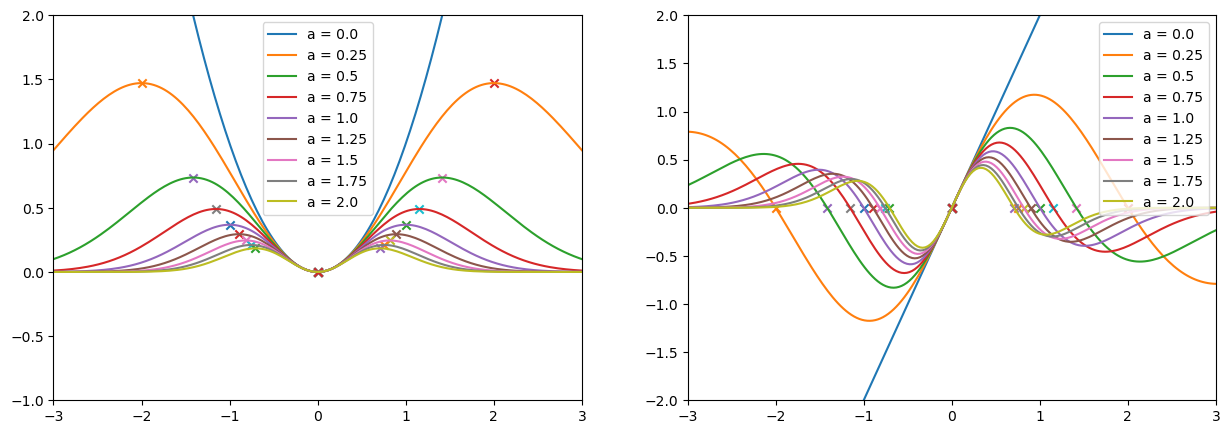

In [838]:
from sympy.abc import x,a

aa = np.arange(0,2.25,0.25)
xx = np.linspace(-3,3,201)

fig,ax = plt.subplots(1,2,figsize=(15,5))
for aaa in aa:
    fxa = x**2 * sym.exp(-aaa*x**2)
    fxax = sym.lambdify(x,fxa)

    dfxa = sym.diff(fxa)
    dfxax = sym.lambdify(x,dfxa)
    
    critical_points = np.float64(sym.solve(dfxa)) # CONVERT SYMPY SYMBOLOGY INTO A NUMBER
    
    ax[0].plot(xx,fxax(xx),label=f'a = {aaa}')
    ax[1].plot(xx,dfxax(xx),label=f'a = {aaa}')
    ax[0].legend()
    ax[1].legend()
    ax[0].axis([xx.min(),xx.max(),-1,2])
    ax[1].axis([xx.min(),xx.max(),-2,2])
    for cp in critical_points:
        ax[0].scatter(cp,fxax(cp),marker='x') # MARKS WHERE THE PEAKS AND VALLEYS ARE, WHICH IS WHEN THE DERIVATIVE IS ZERO
        ax[1].scatter(cp,0,marker='x') # MARKS WHERE THE DERIVATIVE IS ZERO
plt.show()

# PARTIAL DERIVATIVES
* Useful when you have a function with more than one variable.  
* is the derivative of one variable while holding the other variables constant
* notation: $\frac{\partial f}{\partial x} = 2y^{2}$
* $f(x,y) = 2xy^{2}$
* $\frac{\partial f}{\partial x} = f_{x} = 2*1*x^{0} * y^{2} = 2y^{2}$
* $\frac{\partial f}{\partial x} = f_{y} = 2x2y = 4xy$

In [548]:
def plot_partial_derivatives(fxy,xx,yy,figsize=(20,20)):
    df_wrt_x = sym.diff(fxy,x)
    df_wrt_y = sym.diff(fxy,y)

    display(Math(f'f(x,y) = {{{sym.latex(fxy)}}}'))
    display(Math(f'\\frac{{\partial f}}{{\partial x}} = {{{sym.latex(df_wrt_x)}}}'))
    display(Math(f'\\frac{{\partial f}}{{\partial y}} = {{{sym.latex(df_wrt_y)}}}'))

    fxyx = sym.lambdify((x,y),fxy)
    df_wrt_xx = sym.lambdify((x,y),df_wrt_x)
    df_wrt_yy = sym.lambdify((x,y),df_wrt_y)


    X,Y = np.meshgrid(xx,yy)

    fig = plt.figure(figsize=figsize)

    ax1 = fig.add_subplot(1,3,1,projection='3d')
    ax1.plot_surface(X,Y,fxyx(X,Y),cmap='viridis')
    ax1.set_title(f'$f(x,y) = {{{sym.latex(fxy)}}}$')

    ax2 = fig.add_subplot(1,3,2,projection='3d')
    ax2.plot_surface(X,Y,df_wrt_xx(X,Y),cmap='viridis')
    ax2.set_title(f'$\\frac{{\\partial f}}{{\\partial x}} = {{{sym.latex(df_wrt_x)}}}$')

    ax3 = fig.add_subplot(1,3,3,projection='3d')
    ax3.plot_surface(X,Y,df_wrt_yy(X,Y),cmap='viridis')
    ax3.set_title(f'$\\frac{{\\partial f}}{{\\partial y}} = {{{sym.latex(df_wrt_y)}}}$')

    plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

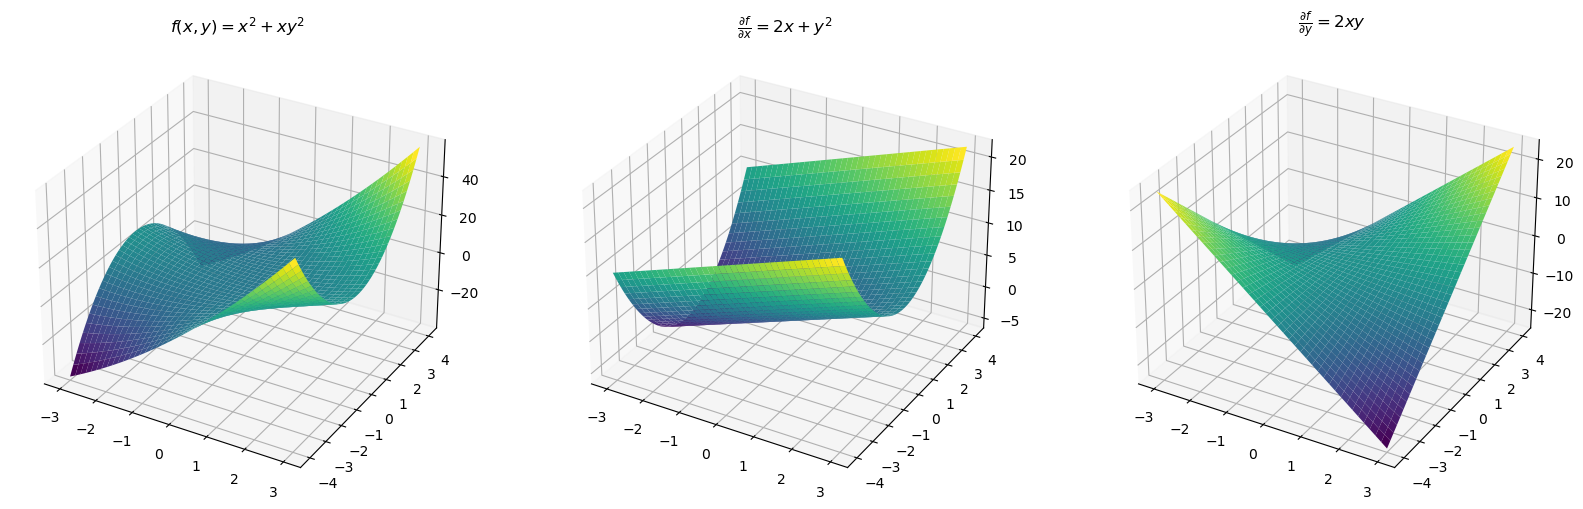

In [549]:
from sympy.abc import x,y

fxy = x**2 + x*y**2
xx = np.linspace(-3,3,201)
yy = np.linspace(-4,4,201)

plot_partial_derivatives(fxy=fxy,xx=xx,yy=yy,figsize=(20,20))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

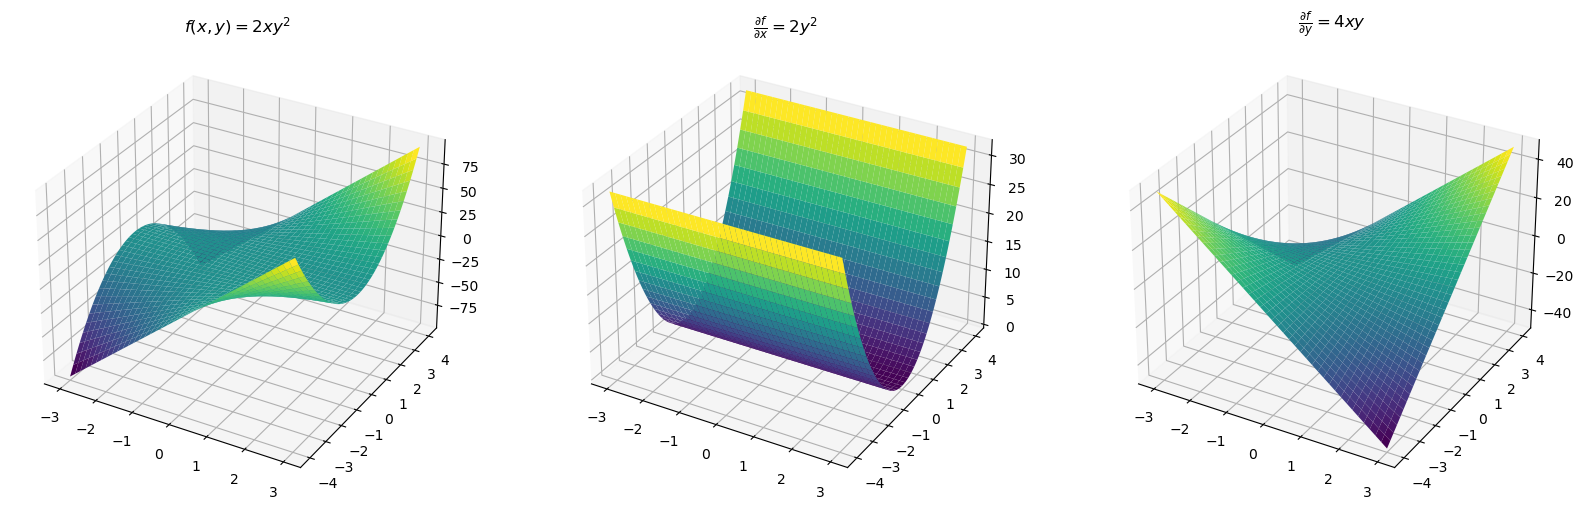

In [552]:
fxy = 2 * x * y**2
xx = np.linspace(-3,3,201)
yy = np.linspace(-4,4,201)
plot_partial_derivatives(fxy=fxy,xx=xx,yy=yy,figsize=(20,20))

# INDEFINITE AND DEFINITE INTEGRALS
* Integral is the area under a curve
* Definite Integral: $\int_{a}^{b}$ $f(x)$ $dx$
* Indefinite Integral: $\int bx^{a}$ $dx = \frac{bx^{a+1}}{a+1}+ c $
* Indefinite Integrals are opposite of a derivative
* $f(x) = 4x^{2}$
* $\int f(x)$ $dx = \frac{4x^3}{3} + c$
* $\frac{4x^3}{3} + c$ $\frac{df}{dx} = 4x^{2}$

In [625]:
from sympy.abc import x,y

fx = 4*x**2 + 1
display(Math(f'f(x) = {{{sym.latex(fx)}}}'))

ifx = sym.integrate(fx) # INDEFINITE INTEGRAL
display(Math(f'\\int f(x)dx = {{{sym.latex(ifx)}}}'))

diverative_of_integral = sym.diff(ifx)
display(Math(f'\\frac{{d\\int f}}{{dx}} = {{{sym.latex(diverative_of_integral)}}}'))

dfx = sym.diff(fx)
display(Math(f'\\frac{{df}}{{dx}} = {{{sym.latex(dfx)}}}'))

i_dfx = sym.integrate(dfx)
display(Math(f'\\int f(x)dx = {{{sym.latex(i_dfx)}}} + C'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

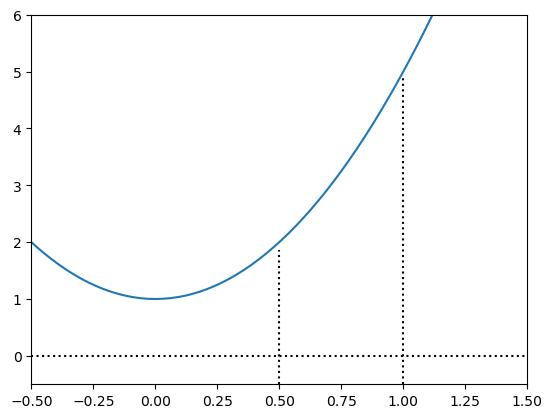

In [616]:
fx = 4*x**2 + 1
a = 0.5
b = 1
integral_fx = sym.integrate(fx,(x,a,b)) # DEFINITE INTEGRAL sym.integrate(fx,(symbol=x,a=0,b=1))
display(Math(f'\\int_{{{a}}}^{{{b}}} f(x) dx = {{{integral_fx}}}'))

xx= np.linspace(-3,3,201)
fxx = sym.lambdify(x,fx)
fig,ax = plt.subplots()
ax.plot(xx,fxx(xx))
xy_max_min = [-0.5,1.5,-0.5,6]
ax.axis(xy_max_min)
ax.axvline(a,ymax=fxx(a)/(xy_max_min[3]+xy_max_min[2]),c='k',ls=':')
ax.axvline(b,ymax=fxx(b)/xy_max_min[3],c='k',ls=':')
ax.axhline(0,c='k',ls=':')

plt.show()

In [626]:
fx = 2*x**3 + sym.sin(x)
display(Math(f'f(x) = {{{sym.latex(fx)}}}'))

dfx = sym.diff(fx)
display(Math(f'\\frac{{df}}{{dx}} = {{{sym.latex(dfx)}}}'))

int_dfx = sym.integrate(dfx)
display(Math(f"\\int f(x)'dx = {{{sym.latex(int_dfx)}}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### AREA UNDER TWO CURVES
$\int_{a}^{b} [f(x) - g(x)] dx $

In [741]:
def plot_auc_two_curves_two_points(fx,gx,xx):
    '''
    This Function gets the area where two functions cross at only two points.
    '''
    from sympy.abc import x
    from matplotlib.patches import Polygon 
    
    fxx = sym.lambdify(x,fx)
    gxx = sym.lambdify(x,gx)
    fig,ax = plt.subplots(1,2,figsize=(9,3))
    ax[0].plot(xx,fxx(xx),label='$f(x)$')
    ax[0].plot(xx,gxx(xx),label='$g(x)$')
    ax[1].plot(xx,fxx(xx),label='$f(x)$')
    ax[1].plot(xx,gxx(xx),label='$g(x)$')
    




    # SYSTEM OF EQUATIONS f(x) == g(x),  f(x) - g(x) = 0
    display(Math(f'f(x) = g(x)'))
    display(Math(f'g(x) - f(x)  = 0'))
    hx = gx-fx
    x_set = np.float64(sym.solve(hx))
    display(Math(f'x = {{{[x for x in x_set]}}} \\text{{ is where the system of equations satisfies x fo both functions. Points where x intersects both functions.}}'))

    # SHOWING THE RESULTS FROM SYSTEM OF EQUATIONS
    for x_ in x_set:
        ax[1].scatter(x_,fxx(x_),c='r', marker='+', s=100)
        ax[1].scatter(x_,gxx(x_),c='g', marker='x', s=100)
    
    assert len(x_set) == 2, f'Functions have only one or more than two intersection points. System of equation points {x_set}'
        
    a = x_set[0]
    b = x_set[1]

    auc = sym.integrate(gx-fx,(x,a,b))
    display(Math(f'\\int_{{{a}}}^{{{b}}} (g(x)-f(x))dx = {{{auc:.3f}}}'))

    xpatch = np.linspace(a,b,201)
    ypatch = np.column_stack((gxx(xpatch),fxx(xpatch)))
    ax[1].add_patch(Polygon(ypatch,facecolor='k',alpha=.3))
    
    ax[0].legend()
    ax[0].set_title('$f(x) and g(x)$')
    ax[1].legend()
    ax[1].set_title(f'$f(x)$ and $g(x)$ Zoomed in. AUC: {auc:.3f}')
    ax[1].axis([a-1,b+1,fxx(a)-1,fxx(b)+1])
    plt.show()

In [826]:
def plot_auc_two_curves(fx,gx,xx,a,b,figsize=(5,5)):
    '''
    '''
    from sympy.abc import x

    fxx = sym.lambdify(x,fx)
    gxx = sym.lambdify(x,gx)
    auc = sym.integrate(fx-gx,(x,a,b))
    
    display(Math(f'\\int_{{{a}}}^{{{b}}} (f(x) - g(x))dx = {{{auc:.3f}}}'))
    
    hx = fx-gx
    x_set = sym.solve(hx)
    display(Math(f'x \\text{{ points where the function crosses}}: {{{[np.real(complex(i)) for i in x_set]}}}'))
    
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(xx,fxx(xx),label='$f(x)$')
    ax.plot(xx,gxx(xx),label='$g(x)$')
    ax.axvline(a,c='green',ls=':',label='$a$')
    ax.axvline(b,c='k',ls=':',label='$b$')
    ax.legend()
    ax.set_title(f'$\int_{{{a}}}^{{{b}}} (f(x) - g(x))dx =$ {auc:.3f}')

    plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

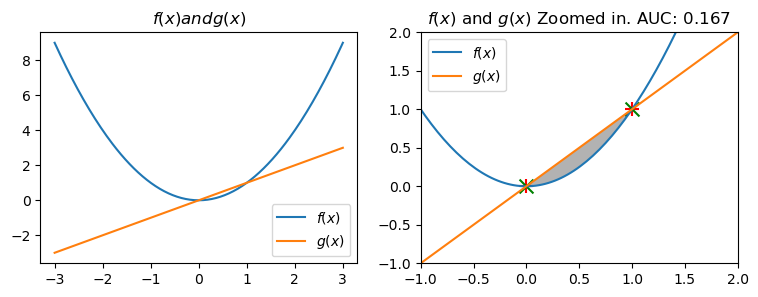

In [743]:
fx = x**2
gx = x
xx = np.linspace(-3,3,201)


plot_auc_two_curves_two_points(fx=fx,gx=gx,xx=xx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

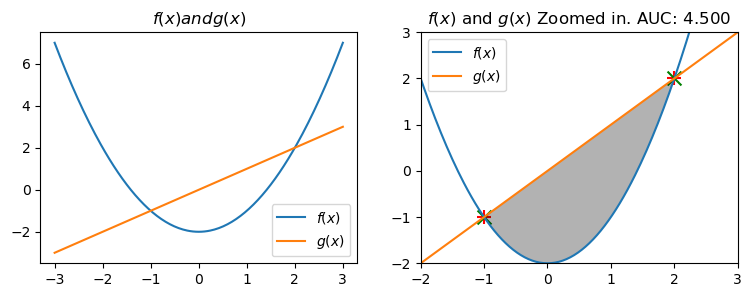

In [744]:
fx = x**2 -2
gx = x
xx = np.linspace(-3,3,201)


plot_auc_two_curves_two_points(fx=fx,gx=gx,xx=xx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

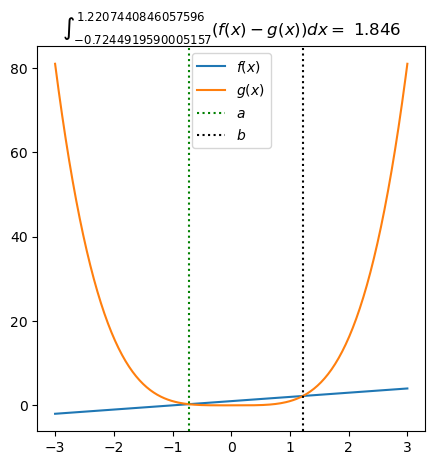

In [830]:
fx = x**4
gx = x+1
xx = np.linspace(-3,3,201)

plot_auc_two_curves(fx=gx, gx=fx, xx=xx, a=-0.7244919590005157, b=1.2207440846057596, figsize=(5,5))

# PLAYING AROUND

### SECOND ORDER DERIVATIVE

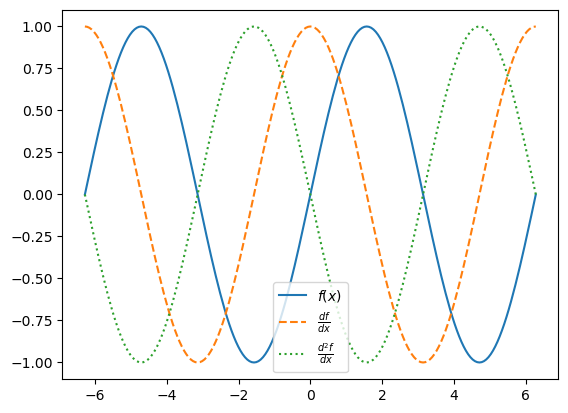

In [836]:
xx = np.linspace(-2*np.pi,2*np.pi,201)

fx = sym.sin(x)
fxx = sym.lambdify(x,fx)

dfx = sym.diff(fx)
dfxx = sym.lambdify(x,dfx)

dfx2 = sym.diff(dfx) # SECOND ORDER DERIVATIVE.  DERIVATIVE OF THE DERIVATIVE.
dfx2x = sym.lambdify(x,dfx2)

plt.plot(xx,fxx(xx),label='$f(x)$')
plt.plot(xx,dfxx(xx),ls='--',label='$\\frac{df}{dx}$')
plt.plot(xx,dfx2x(xx),ls=':',label='$\\frac{d^{2}f}{dx}$')
plt.legend()
plt.show()